# Fisheries competition

In this notebook we're going to investigate a range of different architectures for the [Kaggle fisheries competition](https://www.kaggle.com/c/the-nature-conservancy-fisheries-monitoring/).  The video states that vgg.py and ``vgg_ft()`` from utils.py have been updated to include VGG with batch normalization, but this is not the case.  We've instead created a new file [vgg_bn.py](https://github.com/fastai/courses/blob/master/deeplearning1/nbs/vgg16bn.py) and an additional method ``vgg_ft_bn()`` (which is already in utils.py) which we use in this notebook.

## Setup data dirs

First, we need to copy the dataset to a read-write location.

In [1]:
import os
from subprocess import call
import shutil

In [2]:
# toy
# os.chdir('/home/ubuntu')
# os.getcwd()

In [3]:
# 디렉토리 바꿔주기
if (os.getcwd() != "/home/ubuntu/Sansung"):
    os.chdir('/home/ubuntu/Sansung')
print os.getcwd(),":current dir"

/home/ubuntu/Sansung :current dir


In [4]:
# path에 따른 디렉토리 만들어주기: 이미 있으면 안 만들고 해당 디렉토리 내의 내용 삭제

def mk_path(path_list):
    # path_list에서 상위 디렉토리부터 하위 디렉토리 순으로 집어넣는 게 좋음
    path_list = ['/home/ubuntu/Sansung'+path for path in path_list]
    for path in path_list:
        try:
            if (os.path.isdir(path)):
                # 해당 디렉토리가 존재하면
                print("already exists, every file has been removed!")
                # 디렉토리 포함 하위 내용 다 삭제
                shutil.rmtree(path)
            # 디렉토리 만들어주기
            os.mkdir(path)
        except OSError:
            print ("Creation of the directory %s failed" % path)
        else:
            print ("Successfully created the directory %s " % path)

In [5]:
# path_list = ['/temp1', '/temp1/temp2', '/temp1/temp3']
# mk_path(path_list)
# !tree

In [6]:
# os.chdir(os.getcwd()+'/temp2')
# !pwd

In [7]:
path_list = ['/output','/output/data', '/output/data/fish', 
             '/output/data/fish/test', '/output/data/fish/models',
             '/output/data/fish/train', '/output/data/fish/valid', 
             '/sample', '/sample/train',
             '/sample/valid',
             '/sample/results']
mk_path(path_list)

already exists, every file has been removed!
Successfully created the directory /home/ubuntu/Sansung/output 
Successfully created the directory /home/ubuntu/Sansung/output/data 
Successfully created the directory /home/ubuntu/Sansung/output/data/fish 
Successfully created the directory /home/ubuntu/Sansung/output/data/fish/test 
Successfully created the directory /home/ubuntu/Sansung/output/data/fish/models 
Successfully created the directory /home/ubuntu/Sansung/output/data/fish/train 
Successfully created the directory /home/ubuntu/Sansung/output/data/fish/valid 
already exists, every file has been removed!
Successfully created the directory /home/ubuntu/Sansung/sample 
Successfully created the directory /home/ubuntu/Sansung/sample/train 
Successfully created the directory /home/ubuntu/Sansung/sample/valid 
Successfully created the directory /home/ubuntu/Sansung/sample/results 


In [8]:
# train.zip cp로 옮기고 test에 test_stg.zip 옮기기
!cp /home/ubuntu/Sansung/train.zip /home/ubuntu/Sansung/output/data/fish
!cp /home/ubuntu/Sansung/test_stg1.zip /home/ubuntu/Sansung/output/data/fish/test
!ls /home/ubuntu/Sansung/output/data/fish
!ls /home/ubuntu/Sansung/output/data/fish/test

models	test  train  train.zip	valid
test_stg1.zip


In [9]:
from zipfile import ZipFile
%cd
%cd /home/ubuntu/Sansung/output/data/fish
zipper = ZipFile('train.zip')
zipper.extractall()
%cd
%cd /home/ubuntu/Sansung/output/data/fish/test
zipper = ZipFile('test_stg1.zip')
zipper.extractall()

/home/ubuntu
/home/ubuntu/Sansung/output/data/fish
/home/ubuntu
/home/ubuntu/Sansung/output/data/fish/test


In [10]:
%mv /home/ubuntu/Sansung/output/data/fish/test/test_stg1 /home/ubuntu/Sansung/output/data/fish/test/test

In [11]:
!ls /home/ubuntu/Sansung/output/data/fish/test

test  test_stg1.zip


We create the validation and sample sets in the usual way.

In [12]:
from glob import glob
import os
import numpy as np

%cd /home/ubuntu/Sansung/output/data/fish/train
g = glob('*')
print(g)
for d in g: os.mkdir('/home/ubuntu/Sansung/output/data/fish/valid/'+d)

/home/ubuntu/Sansung/output/data/fish/train
['DOL', 'NoF', 'LAG', 'YFT', 'SHARK', 'ALB', 'BET', 'OTHER']


In [13]:
g = glob('*/*.jpg')
shuf = np.random.permutation(g)

In [14]:
print(shuf.shape)
print(shuf)

(3777,)
['ALB/img_01130.jpg' 'OTHER/img_02942.jpg' 'ALB/img_05605.jpg' ...
 'YFT/img_03035.jpg' 'ALB/img_03145.jpg' 'ALB/img_00156.jpg']


In [15]:
for i in range(500): os.rename(shuf[i], '/home/ubuntu/Sansung/output/data/fish/valid/' + shuf[i])

In [16]:
from shutil import copyfile

g = glob('*')
for d in g: 
    os.mkdir('/home/ubuntu/Sansung/sample/train/'+d)
    os.mkdir('/home/ubuntu/Sansung/sample/valid/'+d)
    

In [17]:
g = glob('*/*.jpg')
shuf = np.random.permutation(g)
for i in range(400): copyfile(shuf[i], 
                              '/home/ubuntu/Sansung/sample/train/' + shuf[i])

%cd /home/ubuntu/Sansung/output/data/fish/valid

g = glob('*/*.jpg')
shuf = np.random.permutation(g)
for i in range(200): copyfile(shuf[i], 
                              '/home/ubuntu/Sansung/sample/valid/' + shuf[i])

%cd /home/ubuntu/Sansung/output/data/fish

/home/ubuntu/Sansung/output/data/fish/valid
/home/ubuntu/Sansung/output/data/fish


In [18]:
%cd /home/ubuntu/Sansung/output

/home/ubuntu/Sansung/output


# Imports and data loading

In [19]:
# !sudo pip uninstall -y theano

In [20]:
# !sudo pip install theano==0.9
import theano
theano.__version__

'0.9.0'

In [21]:
from theano.sandbox import cuda

In [22]:
%cd /home/ubuntu/Sansung


/home/ubuntu/Sansung


In [23]:
%matplotlib inline
import utils; reload(utils)
from utils import *
from __future__ import division, print_function

Using TensorFlow backend.


In [24]:
#path = "/output/data/fish/sample/"
path = "/home/ubuntu/Sansung/output/data/fish/"
batch_size=64

In [25]:
batches = get_batches(path+'train', batch_size=batch_size)
val_batches = get_batches(path+'valid', batch_size=batch_size*2, shuffle=False)

(val_classes, trn_classes, val_labels, trn_labels, 
    val_filenames, filenames, test_filenames) = get_classes(path)

Found 3277 images belonging to 8 classes.
Found 500 images belonging to 8 classes.
Found 3277 images belonging to 8 classes.
Found 500 images belonging to 8 classes.
Found 1000 images belonging to 1 classes.


Sometimes it's helpful to have just the filenames, without the path.

In [26]:
raw_filenames = [f.split('/')[-1] for f in filenames]
raw_test_filenames = [f.split('/')[-1] for f in test_filenames]
raw_val_filenames = [f.split('/')[-1] for f in val_filenames]

## Basic VGG

We start with our usual VGG approach.  We will be using VGG with batch normalization.  We explained how to add batch normalization to VGG in the [imagenet_batchnorm notebook](https://github.com/fastai/courses/blob/master/deeplearning1/nbs/imagenet_batchnorm.ipynb).  VGG with batch normalization is implemented in [vgg_bn.py](https://github.com/fastai/courses/blob/master/deeplearning1/nbs/vgg16bn.py), and there is a version of ``vgg_ft`` (our fine tuning function) with batch norm called ``vgg_ft_bn`` in [utils.py](https://github.com/fastai/courses/blob/master/deeplearning1/nbs/utils.py).

### Initial model

First we create a simple fine-tuned VGG model to be our starting point.

In [27]:
from vgg16bn import Vgg16BN
model = vgg_ft_bn(8)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.






Instructions for updating:
keep_dims is deprecated, use keepdims instead



In [28]:
trn = get_data(path+'train')
val = get_data(path+'valid')

Found 3277 images belonging to 8 classes.
Found 500 images belonging to 8 classes.


In [29]:
test = get_data(path+'test')

Found 1000 images belonging to 1 classes.


In [31]:
!pwd
# conv_val_feat.shape

/home/ubuntu/Sansung


NameError: name 'conv_val_feat' is not defined

In [32]:
path2 = '/home/ubuntu/Sansung/'
save_array(path2+'results/trn.dat', trn)
save_array(path2+'results/val.dat', val)

In [33]:
save_array(path2+'results/test.dat', test)

In [34]:
trn = load_array(path2+'results/trn.dat')
val = load_array(path2+'results/val.dat')

In [35]:
test = load_array(path2+'results/test.dat')

In [36]:
gen = image.ImageDataGenerator()

In [37]:
model.compile(optimizer=Adam(1e-3),
       loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.fit(trn, trn_labels, batch_size=batch_size, nb_epoch=3, validation_data=(val, val_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3277 samples, validate on 500 samples
Epoch 1/3
3277/3277 [==============================] - 47s - loss: 2.8313 - acc: 0.4834 - val_loss: 1.5581 - val_acc: 0.5980
Epoch 2/3
3277/3277 [==============================] - 35s - loss: 1.5874 - acc: 0.6503 - val_loss: 0.8217 - val_acc: 0.7680
Epoch 3/3
3277/3277 [==============================] - 35s - loss: 1.3505 - acc: 0.7031 - val_loss: 0.6162 - val_acc: 0.8300


In [40]:
model.save_weights(path2+'results/ft1.h5')
# conv_val_feat.shape

### Precompute convolutional output

We pre-compute the output of the last convolution layer of VGG, since we're unlikely to need to fine-tune those layers. (All following analysis will be done on just the pre-computed convolutional features.)

In [41]:
model.load_weights(path2+'results/ft1.h5')

In [42]:
conv_layers,fc_layers = split_at(model, Convolution2D)

In [43]:
conv_model = Sequential(conv_layers)

In [44]:
conv_feat = conv_model.predict(trn)
conv_val_feat = conv_model.predict(val)

In [45]:
conv_test_feat = conv_model.predict(test)

In [46]:
save_array(path2+'results/conv_val_feat.dat', conv_val_feat)
save_array(path2+'results/conv_feat.dat', conv_feat)

In [47]:
save_array(path2+'results/conv_test_feat.dat', conv_test_feat)

In [48]:
conv_feat = load_array(path2+'results/conv_feat.dat')
conv_val_feat = load_array(path2+'results/conv_val_feat.dat')

In [49]:
conv_test_feat = load_array(path2+'results/conv_test_feat.dat')

In [50]:
conv_val_feat.shape

(500, 512, 14, 14)

### Train model

We can now create our first baseline model - a simple 3-layer FC net.

In [51]:
def get_bn_layers(p):
    return [
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        BatchNormalization(axis=1),
        Dropout(p/4),
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(p/2),
        Dense(8, activation='softmax')
    ]

In [52]:
p=0.6

In [53]:
bn_model = Sequential(get_bn_layers(p))
bn_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
bn_model.fit(conv_feat, trn_labels, batch_size=batch_size, nb_epoch=3, 
             validation_data=(conv_val_feat, val_labels))

Train on 3277 samples, validate on 500 samples
Epoch 1/3
3277/3277 [==============================] - 3s - loss: 1.0763 - acc: 0.6768 - val_loss: 0.6642 - val_acc: 0.8780
Epoch 2/3
3277/3277 [==============================] - 2s - loss: 0.3124 - acc: 0.9054 - val_loss: 0.4057 - val_acc: 0.9260
Epoch 3/3
3277/3277 [==============================] - 2s - loss: 0.1657 - acc: 0.9500 - val_loss: 0.2390 - val_acc: 0.9520


In [55]:
bn_model.optimizer.lr = 1e-4

In [56]:
bn_model.fit(conv_feat, trn_labels, batch_size=batch_size, nb_epoch=7, 
             validation_data=(conv_val_feat, val_labels))

Train on 3277 samples, validate on 500 samples
Epoch 1/7
3277/3277 [==============================] - 2s - loss: 0.0796 - acc: 0.9762 - val_loss: 0.2394 - val_acc: 0.9560
Epoch 2/7
3277/3277 [==============================] - 2s - loss: 0.0707 - acc: 0.9823 - val_loss: 0.2192 - val_acc: 0.9580
Epoch 3/7
3277/3277 [==============================] - 2s - loss: 0.0688 - acc: 0.9799 - val_loss: 0.2185 - val_acc: 0.9560
Epoch 4/7
3277/3277 [==============================] - 2s - loss: 0.0590 - acc: 0.9829 - val_loss: 0.2418 - val_acc: 0.9520
Epoch 5/7
3277/3277 [==============================] - 2s - loss: 0.0436 - acc: 0.9875 - val_loss: 0.2039 - val_acc: 0.9640
Epoch 6/7
3277/3277 [==============================] - 2s - loss: 0.0509 - acc: 0.9857 - val_loss: 0.2147 - val_acc: 0.9620
Epoch 7/7
3277/3277 [==============================] - 2s - loss: 0.0581 - acc: 0.9841 - val_loss: 0.2016 - val_acc: 0.9700


In [57]:
bn_model.save_weights(path+'models/conv_512_6.h5')

In [58]:
bn_model.evaluate(conv_val_feat, val_labels)

500/500 [==============================] - 0s     


[0.20164078232645988, 0.9700000009536743]

In [59]:
bn_model.load_weights(path+'models/conv_512_6.h5')

In [60]:
conv_val_feat.shape

(500, 512, 14, 14)

## Multi-input

The images are of different sizes, which are likely to represent the boat they came from (since different boats will use different cameras). Perhaps this creates some data leakage that we can take advantage of to get a better Kaggle leaderboard position? To find out, first we create arrays of the file sizes for each image:

In [71]:
sizes = [PIL.Image.open(path+'train/'+f).size for f in filenames]
id2size = list(set(sizes))
size2id = {o:i for i,o in enumerate(id2size)}

In [72]:
import collections
collections.Counter(sizes)

Counter({(1192, 670): 170,
         (1244, 700): 25,
         (1276, 718): 189,
         (1280, 720): 1898,
         (1280, 750): 511,
         (1280, 924): 52,
         (1280, 974): 341,
         (1334, 750): 27,
         (1518, 854): 34,
         (1732, 974): 30})

Then we one-hot encode them (since we want to treat them as categorical) and normalize the data.

In [73]:
trn_sizes_orig = to_categorical([size2id[o] for o in sizes], len(id2size))

In [74]:
raw_val_sizes = [PIL.Image.open(path+'valid/'+f).size for f in val_filenames]
val_sizes = to_categorical([size2id[o] for o in raw_val_sizes], len(id2size))

In [75]:
trn_sizes = trn_sizes_orig-trn_sizes_orig.mean(axis=0)/trn_sizes_orig.std(axis=0)
val_sizes = val_sizes-trn_sizes_orig.mean(axis=0)/trn_sizes_orig.std(axis=0)

To use this additional "meta-data", we create a model with multiple input layers - `sz_inp` will be our input for the size information.

In [76]:
p=0.6

In [77]:
inp = Input(conv_layers[-1].output_shape[1:])
sz_inp = Input((len(id2size),))
bn_inp = BatchNormalization()(sz_inp)

x = MaxPooling2D()(inp)
x = BatchNormalization(axis=1)(x)
x = Dropout(p/4)(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(p)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(p/2)(x)
x = merge([x,bn_inp], 'concat')
x = Dense(8, activation='softmax')(x)

When we compile the model, we have to specify all the input layers in an array.

In [78]:
model = Model([inp, sz_inp], x)
model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

And when we train the model, we have to provide all the input layers' data in an array.

In [79]:
model.fit([conv_feat, trn_sizes], trn_labels, batch_size=batch_size, nb_epoch=3, 
             validation_data=([conv_val_feat, val_sizes], val_labels))

Train on 3277 samples, validate on 500 samples
Epoch 1/3
3277/3277 [==============================] - 3s - loss: 1.0453 - acc: 0.6869 - val_loss: 0.8254 - val_acc: 0.8640
Epoch 2/3
3277/3277 [==============================] - 1s - loss: 0.3186 - acc: 0.9069 - val_loss: 0.3294 - val_acc: 0.9360
Epoch 3/3
3277/3277 [==============================] - 1s - loss: 0.1412 - acc: 0.9606 - val_loss: 0.2531 - val_acc: 0.9560


In [80]:
bn_model.optimizer.lr = 1e-4

In [81]:
bn_model.fit(conv_feat, trn_labels, batch_size=batch_size, nb_epoch=8, 
             validation_data=(conv_val_feat, val_labels))

Train on 3277 samples, validate on 500 samples
Epoch 1/8
3277/3277 [==============================] - 1s - loss: 0.0477 - acc: 0.9890 - val_loss: 0.2065 - val_acc: 0.9700
Epoch 2/8
3277/3277 [==============================] - 1s - loss: 0.0283 - acc: 0.9921 - val_loss: 0.1959 - val_acc: 0.9640
Epoch 3/8
3277/3277 [==============================] - 1s - loss: 0.0300 - acc: 0.9912 - val_loss: 0.2379 - val_acc: 0.9640
Epoch 4/8
3277/3277 [==============================] - 1s - loss: 0.0270 - acc: 0.9921 - val_loss: 0.2180 - val_acc: 0.9560
Epoch 5/8
3277/3277 [==============================] - 1s - loss: 0.0205 - acc: 0.9927 - val_loss: 0.2083 - val_acc: 0.9580
Epoch 6/8
3277/3277 [==============================] - 1s - loss: 0.0323 - acc: 0.9890 - val_loss: 0.2375 - val_acc: 0.9640
Epoch 7/8
3277/3277 [==============================] - 1s - loss: 0.0247 - acc: 0.9924 - val_loss: 0.2579 - val_acc: 0.9560
Epoch 8/8
3277/3277 [==============================] - 1s - loss: 0.0211 - acc: 0.992

The model did not show an improvement by using the leakage, other than in the early epochs. This is most likely because the information about what boat the picture came from is readily identified from the image itself, so the meta-data turned out not to add any additional information.

## Bounding boxes & multi output

### Import / view bounding boxes

A kaggle user has created bounding box annotations for each fish in each training set image. You can download them [from here](https://www.kaggle.com/c/the-nature-conservancy-fisheries-monitoring/forums/t/25902/complete-bounding-box-annotation). We will see if we can utilize this additional information. First, we'll load in the data, and keep just the largest bounding box for each image.

In [82]:
#import ujson as json

In [83]:
anno_classes = ['alb', 'bet', 'dol', 'lag', 'other', 'shark', 'yft']

In [84]:
conv_val_feat.shape

(500, 512, 14, 14)

In [85]:
!pwd

/home/ubuntu/Sansung


In [86]:
def get_annotations():
    annot_urls = {
        '5458/bet_labels.json': 'bd20591439b650f44b36b72a98d3ce27',
        '5459/shark_labels.json': '94b1b3110ca58ff4788fb659eda7da90',
        '5460/dol_labels.json': '91a25d29a29b7e8b8d7a8770355993de',
        '5461/yft_labels.json': '9ef63caad8f076457d48a21986d81ddc',
        '5462/alb_labels.json': '731c74d347748b5272042f0661dad37c',
        '5463/lag_labels.json': '92d75d9218c3333ac31d74125f2b380a'
    }
    cache_subdir = os.path.abspath(os.path.join(path, 'annos'))
    #url_prefix = 'https://kaggle2.blob.core.windows.net/forum-message-attachments/147157/'
    #https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5458/bet_labels.json
    url_prefix = 'https://storage.googleapis.com/kaggle-forum-message-attachments/147157/'
    #http://52.203.141.131:8080/tree/Sansung/JsonFile
    
    if not os.path.exists(cache_subdir):
        os.makedirs(cache_subdir)
    
    for url_suffix, md5_hash in annot_urls.iteritems():
        fname = url_suffix.rsplit('/', 1)[-1]
        #get_file(fname, url_prefix , cache_subdir=cache_subdir, md5_hash=md5_hash)
        get_file(fname, url_prefix+ url_suffix, cache_subdir=cache_subdir, md5_hash=md5_hash)

In [87]:
get_annotations()

In [88]:
bb_json = {}
for c in anno_classes:
    if c == 'other': continue # no annotation file for "other" class
    j = json.load(open('{}annos/{}_labels.json'.format(path, c), 'r'))
    for l in j:
        if 'annotations' in l.keys() and len(l['annotations'])>0:
            bb_json[l['filename'].split('/')[-1]] = sorted(
                l['annotations'], key=lambda x: x['height']*x['width'])[-1]

In [89]:
bb_json['img_04908.jpg']

{u'class': u'rect',
 u'height': 246.75000000000074,
 u'width': 432.8700000000013,
 u'x': 465.3000000000014,
 u'y': 496.32000000000147}

In [90]:
file2idx = {o:i for i,o in enumerate(raw_filenames)}
val_file2idx = {o:i for i,o in enumerate(raw_val_filenames)}

For any images that have no annotations, we'll create an empty bounding box.

In [91]:
empty_bbox = {'height': 0., 'width': 0., 'x': 0., 'y': 0.}

In [92]:
for f in raw_filenames:
    if not f in bb_json.keys(): bb_json[f] = empty_bbox
for f in raw_val_filenames:
    if not f in bb_json.keys(): bb_json[f] = empty_bbox

Finally, we convert the dictionary into an array, and convert the coordinates to our resized 224x224 images.

In [93]:
bb_params = ['height', 'width', 'x', 'y']
def convert_bb(bb, size):
    bb = [bb[p] for p in bb_params]
    conv_x = (224. / size[0])
    conv_y = (224. / size[1])
    bb[0] = bb[0]*conv_y
    bb[1] = bb[1]*conv_x
    bb[2] = max(bb[2]*conv_x, 0)
    bb[3] = max(bb[3]*conv_y, 0)
    return bb

In [94]:
trn_bbox = np.stack([convert_bb(bb_json[f], s) for f,s in zip(raw_filenames, sizes)], 
                   ).astype(np.float32)
val_bbox = np.stack([convert_bb(bb_json[f], s) 
                   for f,s in zip(raw_val_filenames, raw_val_sizes)]).astype(np.float32)

Now we can check our work by drawing one of the annotations.

In [95]:
def create_rect(bb, color='red'):
    return plt.Rectangle((bb[2], bb[3]), bb[1], bb[0], color=color, fill=False, lw=3)

def show_bb(i):
    bb = val_bbox[i]
    plot(val[i])
    plt.gca().add_patch(create_rect(bb))

In [ ]:
show_bb(0)

In [97]:
conv_val_feat.shape

(500, 512, 14, 14)

### Create & train model

Since we're not allowed (by the kaggle rules) to manually annotate the test set, we'll need to create a model that predicts the locations of the bounding box on each image. To do so, we create a model with multiple outputs: it will predict both the type of fish (the 'class'), and the 4 bounding box coordinates. We prefer this approach to only predicting the bounding box coordinates, since we hope that giving the model more context about what it's looking for will help it with both tasks.

In [108]:
p=0.6

In [109]:
inp = Input(conv_layers[-1].output_shape[1:])
x = MaxPooling2D()(inp)
x = BatchNormalization(axis=1)(x)
x = Dropout(p/4)(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(p)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(p/2)(x)
x_bb = Dense(4, name='bb')(x)
x_class = Dense(8, activation='softmax', name='class')(x)

In [110]:
conv_val_feat.shape

(500, 512, 14, 14)

Since we have multiple outputs, we need to provide them to the model constructor in an array, and we also need to say what loss function to use for each. We also weight the bounding box loss function down by 1000x since the scale of the cross-entropy loss and the MSE is very different.

In [111]:
model = Model([inp], [x_bb, x_class])
model.compile(Adam(lr=0.001), loss=['mse', 'categorical_crossentropy'], metrics=['accuracy'],
             loss_weights=[.001, 1.])

In [112]:
model.fit(conv_feat, [trn_bbox, trn_labels], batch_size=batch_size, nb_epoch=3, 
             validation_data=(conv_val_feat, [val_bbox, val_labels]))

Train on 3277 samples, validate on 500 samples
Epoch 1/3
3277/3277 [==============================] - 3s - loss: 5.5666 - bb_loss: 4483.2403 - class_loss: 1.0833 - bb_acc: 0.3912 - class_acc: 0.6823 - val_loss: 4.8345 - val_bb_loss: 4064.2515 - val_class_loss: 0.7702 - val_bb_acc: 0.5160 - val_class_acc: 0.8680
Epoch 2/3
3277/3277 [==============================] - 2s - loss: 4.5110 - bb_loss: 4203.5339 - class_loss: 0.3075 - bb_acc: 0.4849 - class_acc: 0.9100 - val_loss: 3.9776 - val_bb_loss: 3693.2729 - val_class_loss: 0.2843 - val_bb_acc: 0.5220 - val_class_acc: 0.9460
Epoch 3/3
3277/3277 [==============================] - 2s - loss: 3.8267 - bb_loss: 3679.2269 - class_loss: 0.1474 - bb_acc: 0.4992 - class_acc: 0.9603 - val_loss: 3.2792 - val_bb_loss: 3067.2320 - val_class_loss: 0.2119 - val_bb_acc: 0.5180 - val_class_acc: 0.9600


In [113]:
model.optimizer.lr = 1e-5

In [114]:
model.fit(conv_feat, [trn_bbox, trn_labels], batch_size=batch_size, nb_epoch=10, 
             validation_data=(conv_val_feat, [val_bbox, val_labels]))

Train on 3277 samples, validate on 500 samples
Epoch 1/10
3277/3277 [==============================] - 2s - loss: 3.0806 - bb_loss: 2981.8561 - class_loss: 0.0988 - bb_acc: 0.5343 - class_acc: 0.9728 - val_loss: 2.5388 - val_bb_loss: 2350.7295 - val_class_loss: 0.1881 - val_bb_acc: 0.5920 - val_class_acc: 0.9740
Epoch 2/10
3277/3277 [==============================] - 2s - loss: 2.3665 - bb_loss: 2294.1428 - class_loss: 0.0724 - bb_acc: 0.5786 - class_acc: 0.9811 - val_loss: 1.9366 - val_bb_loss: 1742.4936 - val_class_loss: 0.1941 - val_bb_acc: 0.6180 - val_class_acc: 0.9660
Epoch 3/10
3277/3277 [==============================] - 2s - loss: 1.6950 - bb_loss: 1626.5552 - class_loss: 0.0684 - bb_acc: 0.6115 - class_acc: 0.9799 - val_loss: 1.4857 - val_bb_loss: 1239.3918 - val_class_loss: 0.2463 - val_bb_acc: 0.6620 - val_class_acc: 0.9660
Epoch 4/10
3277/3277 [==============================] - 2s - loss: 1.1075 - bb_loss: 1050.0956 - class_loss: 0.0574 - bb_acc: 0.6631 - class_acc: 0.9863

Excitingly, it turned out that the classification model is much improved by giving it this additional task. Let's see how well the bounding box model did by taking a look at its output.

In [117]:
pred = model.predict(conv_val_feat[0:10])

In [118]:
def show_bb_pred(i):
    bb = val_bbox[i]
    bb_pred = pred[0][i]
    plt.figure(figsize=(6,6))
    plot(val[i])
    ax=plt.gca()
    ax.add_patch(create_rect(bb_pred, 'yellow'))
    ax.add_patch(create_rect(bb))

The image shows that it can find fish that are tricky for us to see!

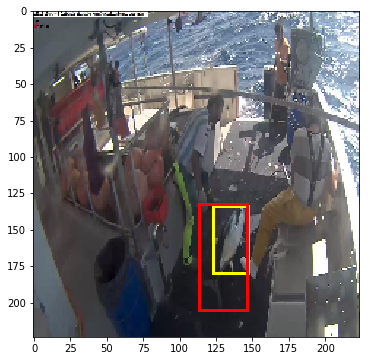

In [119]:
show_bb_pred(6)

In [120]:
model.evaluate(conv_val_feat, [val_bbox, val_labels])

448/500 [=========================>....] - ETA: 0s

[0.44675287914276124,
 226.79145666503905,
 0.21996141357719898,
 0.786,
 0.9679999990463257]

In [121]:
model.save_weights(path+'models/bn_anno.h5')

In [122]:
model.load_weights(path+'models/bn_anno.h5')

In [123]:
conv_val_feat.shape

(500, 512, 14, 14)

## Larger size

### Set up data

Let's see if we get better results if we use larger images. We'll use 640x360, since it's the same shape as the most common size we saw earlier (1280x720), without being too big.

In [124]:
!pwd

/home/ubuntu/Sansung


In [125]:
trn = get_data(path+'train', (224,224))
val = get_data(path+'valid', (224,224))

Found 3277 images belonging to 8 classes.
Found 500 images belonging to 8 classes.


The image shows that things are much clearer at this size.

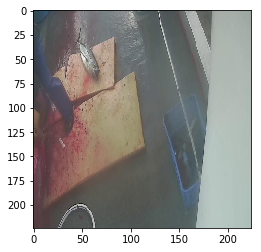

In [126]:
plot(trn[0])

In [127]:
test = get_data(path+'test', (224,224))

Found 1000 images belonging to 1 classes.


In [128]:
save_array(path2+'results/trn_640.dat', trn)
save_array(path2+'results/val_640.dat', val)

In [129]:
save_array(path2+'results/test_640.dat', test)

In [130]:
trn = load_array(path2+'results/trn_640.dat')
val = load_array(path2+'results/val_640.dat')

We can now create our VGG model - we'll need to tell it we're not using the normal 224x224 images, which also means it won't include the fully connected layers (since they don't make sense for non-default sizes). We will also remove the last max pooling layer, since we don't want to throw away information yet.

In [131]:
vgg640 = Vgg16BN((224,224)).model
vgg640.pop()
vgg640.input_shape, vgg640.output_shape
vgg640.compile(Adam(), 'categorical_crossentropy', metrics=['accuracy'])

We can now pre-compute the output of the convolutional part of VGG.

In [132]:
conv_val_feat = vgg640.predict(val, batch_size=32, verbose=1)
conv_trn_feat = vgg640.predict(trn, batch_size=32, verbose=1)

3277/3277 [==============================] - 30s    


In [133]:
save_array(path2+'results/conv_val_640.dat', conv_val_feat)
save_array(path2+'results/conv_trn_640.dat', conv_trn_feat)

In [134]:
conv_test_feat = vgg640.predict(test, batch_size=32, verbose=1)

1000/1000 [==============================] - 9s     


In [135]:
save_array(path2+'results/conv_test_640.dat', conv_test_feat)

In [136]:
conv_val_feat = load_array(path2+'results/conv_val_640.dat')
conv_trn_feat = load_array(path2+'results/conv_trn_640.dat')

In [137]:
conv_val_feat.shape

(500, 4096)

In [138]:
conv_test_feat = load_array(path2+'results/conv_test_640.dat')

## Submit

In [101]:
def do_clip(arr, mx): return np.clip(arr, (1-mx)/7, mx)

In [107]:

# conv_val_feat.shape
#batch_size.__class__
trn_labels.__class__
#conv_val_feat=conv_val_feat.reshape((-1,512,14,14))
# x.shape

numpy.ndarray

In [104]:
model.evaluate(conv_val_feat, trn_labels, batch_size*2)
# help(model)
# dir(model)

ValueError: The model expects 2 input arrays, but only received one array. Found: array with shape (500, 512, 14, 14)

In [65]:
preds = model.predict(conv_test_feat, batch_size=batch_size)

ValueError: Error when checking : expected lambda_input_1 to have shape (None, 3, 224, 224) but got array with shape (1000, 512, 14, 14)

In [ ]:
preds = preds[1]

In [ ]:
test = load_array(path+'results/test_640.dat')

In [ ]:
test = load_array(path+'results/test.dat')

In [ ]:
preds = conv_model.predict(test, batch_size=32)

In [ ]:
subm = do_clip(preds,0.82)

In [ ]:
subm_name = path+'results/subm_bb.gz'

In [ ]:
# classes = sorted(batches.class_indices, key=batches.class_indices.get)
classes = ['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']

In [ ]:
submission = pd.DataFrame(subm, columns=classes)
submission.insert(0, 'image', raw_test_filenames)
submission.head()

In [ ]:
submission.to_csv(subm_name, index=False, compression='gzip')

In [ ]:
FileLink(subm_name)

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

results=confusion_matrix(conv_val_feat,val_labels)
print(results)

In [ ]:
# import seaborn as sn
# df_cm = pd.DataFrame(results,range(2),range(2))
# plt.figure(figsize=(10,7))
# sn.heatmap(df_cm, annot=True)

from sklearn.metrics import classification_report
cfreport=classification_report(conv_val_feat, val_labels)
print("분류예측 레포트:\n", cfreport)